In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path,'train.csv')
test_file_path = os.path.join(raw_data_path,'test.csv')

In [3]:
train = pd.read_csv(train_file_path, index_col='PassengerId')
test = pd.read_csv(test_file_path, index_col='PassengerId')

# Basic Strucure

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 66.1+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 27.8+ KB


In [6]:
test['Survived'] = -888

In [7]:
df = pd.concat((train,test), axis=0)

c:\users\abbas salami\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 97.2+ KB


In [9]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [10]:
df.loc[(df['Sex']=='male') & df['Pclass']==1].head()


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909


# Summary Statistics

In [11]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [12]:
df['Fare'].mean()

33.29547928134557

In [13]:
df['Age'].mean()

29.881137667304014

In [14]:
df.Age.var()

207.74878655136447

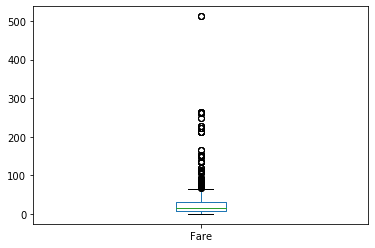

In [15]:
df['Fare'].plot(kind='box')

In [16]:
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [17]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [18]:
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [19]:
df[df['Survived'] != -888]['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

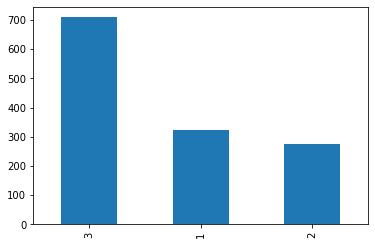

In [20]:
df.Pclass.value_counts().plot(kind='bar')

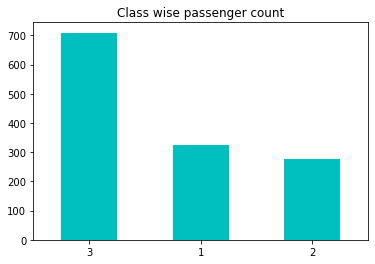

In [21]:
df.Pclass.value_counts().plot(kind='bar',rot=0,title='Class wise passenger count', color='c');

## Distribution

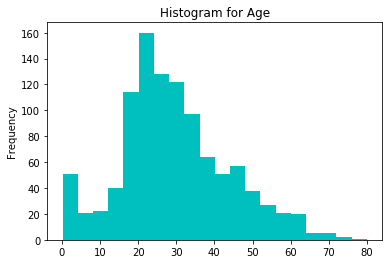

In [22]:
df.Age.plot(kind='hist',title='Histogram for Age', color='c',bins=20);

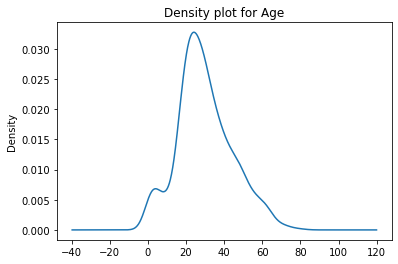

In [23]:
df.Age.plot(kind='kde',title='Density plot for Age');

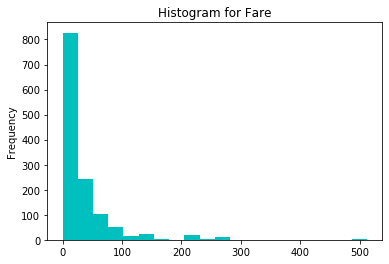

In [24]:
df.Fare.plot(kind='hist',title='Histogram for Fare',color='c',bins=20);

In [25]:
df.Age.skew()

0.40767455974362266

In [26]:
df.Fare.skew()

4.367709134122922

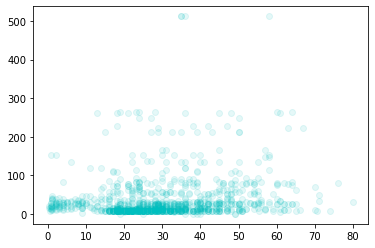

In [27]:
plt.scatter(df['Age'],df['Fare'],color='c',alpha=0.1)

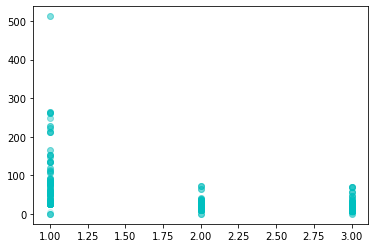

In [28]:
plt.scatter(df['Pclass'],df['Fare'],color='c',alpha=0.15);

In [29]:
len(df[df['Fare'] == 0])

17

In [30]:
len(df.loc[(df['Fare']==0) & (df['Pclass']==1)])

7

In [31]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [32]:
df.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [33]:
df.groupby('Pclass')['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [34]:
df.groupby('Pclass').agg({'Fare': 'mean', 'Age': 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


## Crosstabs

In [35]:
pd.crosstab(df.Sex,df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


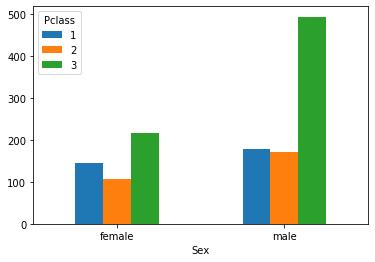

In [36]:
pd.crosstab(df.Sex,df.Pclass).plot(kind='bar',rot=0);

## Pivot Table

In [37]:
df.pivot_table(index='Sex',columns='Pclass',values='Age',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data Munging 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 97.2+ KB


In [39]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [40]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [41]:
pd.crosstab(df[df.Survived != -888]['Survived'], df[df.Survived != -888]['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [42]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [43]:
df.Embarked.fillna('C',inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 97.2+ KB


In [45]:
df[df.Fare.isnull()].head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [46]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'),'Fare'].median()

In [47]:
df.Fare.fillna(median_fare, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 97.2+ KB


In [49]:
df[df.Age.isnull()].head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959


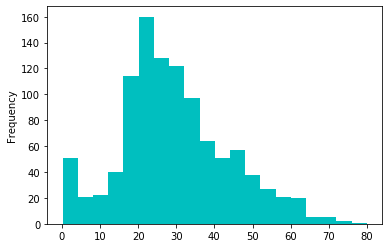

In [50]:
df.Age.plot(kind='hist',bins=20,color='c')

In [51]:
df.Age.mean()

29.881137667304014

In [52]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

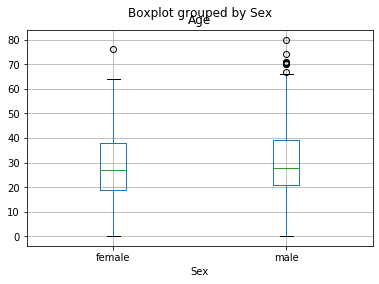

In [53]:
df[df.Age.notnull()].boxplot('Age','Sex')

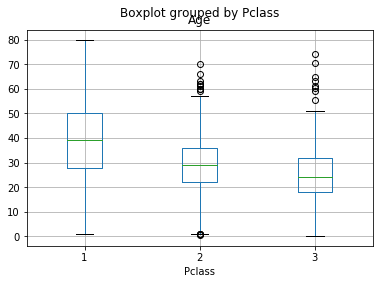

In [54]:
df[df.Age.notnull()].boxplot('Age','Pclass');

In [55]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [56]:
def GetTitle(name):
    first_name = name.split(',')[1]
    title = first_name.split('.')[0]
    title = title.strip().lower()
    return title

In [57]:
df.Name.apply(GetTitle).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [58]:
def GetTitle(name):
    title_group = {'mr': 'Mr',
                   'mrs': 'Mrs',
                   'miss': 'Miss',
                   'master': 'Master',
                   'don': 'Sir',
                   'rev': 'Sir',
                   'dr': 'Officer',
                   'mme': 'Mrs',
                   'ms': 'Mrs',
                   'major': 'Officer',
                   'lady': 'Lady',
                   'sir': 'Sir',
                   'mlle': 'Miss',
                   'col': 'Officer',
                   'capt': 'Officer',
                   'the countess': 'Lady',
                   'jonkheer': 'Sir',
                   'dona': 'Lady'
                  }
    
    first_name = name.split(',')[1]
    title = first_name.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [59]:
df["Title"] = df.Name.apply(GetTitle)

In [60]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


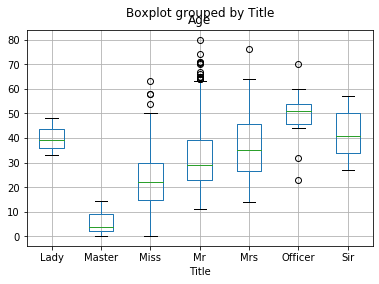

In [61]:
df[df.Age.notnull()].boxplot('Age','Title')

In [67]:
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median,inplace=True)

## Outliers

In [68]:
df[df['Age'] > 70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs


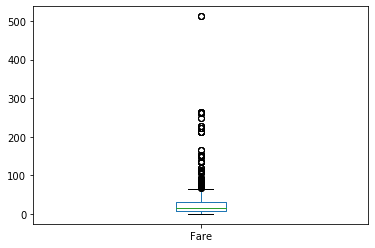

In [70]:
df.Fare.plot(kind='box');

In [71]:
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


In [72]:
LogFare = np.log(df.Fare + 1)

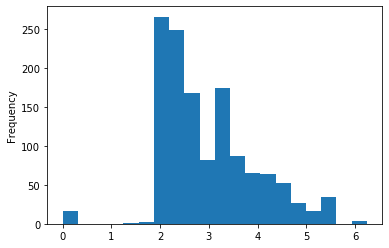

In [73]:
LogFare.plot(kind='hist',bins=20);

In [74]:
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [75]:
pd.qcut(df.Fare, 4, labels = ['very_low','low','high','very_high'])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
          ...    
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

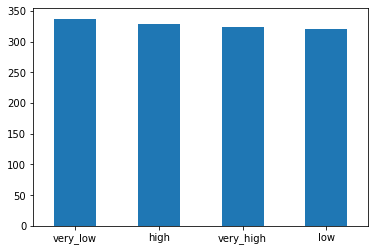

In [76]:
pd.qcut(df.Fare, 4, labels = ['very_low','low','high','very_high']).value_counts().plot(kind='bar',rot=0)

In [77]:
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels = ['very_low','low','high','very_high'])

## Feature Engineering

In [78]:
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult','Child')

In [79]:
df.AgeState.value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [81]:
  pd.crosstab(df[df.Survived != -888]['Survived'], df[df.Survived != -888]['AgeState'])

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


In [83]:
df['FamilySize'] = df.Parch + df.SibSp + 1

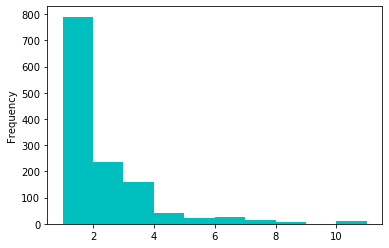

In [84]:
df['FamilySize'].plot(kind='hist',color='c');

In [85]:
df.FamilySize.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [87]:
df.loc[df.FamilySize == df.FamilySize.max(),['Name','Survived','FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-888,11,CA. 2343
1234,"Sage, Mr. John George",-888,11,CA. 2343


In [88]:
pd.crosstab(df[df.Survived != -888]['Survived'], df[df.Survived != -888]['FamilySize'])

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [92]:
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1,0)

In [94]:
pd.crosstab(df[df.Survived != -889]['Survived'], df[df.Survived != -888]['IsMother'])

IsMother,0,1
Survived,,
0,533,16
1,303,39


In [95]:
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [96]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [97]:
df.loc[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very_high,Adult,1,0


In [98]:
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [103]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0],'Z')
df['Deck'] = df['Cabin'].apply(get_deck)

In [104]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [105]:
pd.crosstab(df[df.Survived != -888]['Survived'], df[df.Survived != -888]['Deck'])

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 129.2+ KB


## Categorical Feature Encoding

In [110]:
df['Male'] = np.where((df.Sex == 'male'),1,0)

In [111]:
df = pd.get_dummies(df,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
Male                  1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

In [114]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis=1,inplace=True)

In [118]:
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [119]:
df.head()

,Survived,Age,Fare,FamilySize,IsMother,Male,Deck_A,Deck_B,Deck_C,Deck_D,...,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,1,38.0,71.2833,2,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
3,1,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,1,35.0,53.1000,2,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
5,0,35.0,8.0500,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [120]:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
write_train_path = os.path.join(processed_data_path,'train.csv')
write_test_path = os.path.join(processed_data_path,'test.csv')

In [122]:
df.loc[df.Survived != -888].to_csv(write_train_path)
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -888, columns].to_csv(write_test_path)

## Building data processing script

In [126]:
get_processed_data_script_file = os.path.join(os.path.pardir,'src','data','get_processed_data.py')

In [154]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd 
import os

def read_data():
    # set the path of the raw data 
    raw_data_path = os.path.join(os.path.pardir,'data','raw')
    train_file_path = os.path.join(raw_data_path,'train.csv')
    test_file_path = os.path.join(raw_data_path,'test.csv')
    #read data with default parameters
    train = pd.read_csv(train_file_path,index_col='PassengerId')
    test = pd.read_csv(test_file_path,index_col='PassengerId')
    test['Survived'] = -888
    df = pd.concat((train,test),axis=0,sort=False)
    return df

def process_data(df):
    # using the method chaining concept
    return (df
           #create title attribute - then add this
            .assign(Title = lambda x: x.Name.apply(get_title))
            #working missing values - start with this
            .pipe(fill_missing_values)
            #create fare bin feature
            .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low','low','high','very_high']))
            #create age state
            .assign(AgeState = lambda x: np.where((x.Age >= 18), 'Adult','Child'))
            .assign(FamilySize = lambda x: x.Parch + x.SibSp + 1)
            .assign(IsMother = lambda x: np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18)), 1,0))
            #create deck feature
            .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin))
            .assign(Deck = lambda x: x.Cabin.apply(get_deck))
            #feature encoding
            .assign(IsMale = lambda x: np.where(x.Sex == 'male', 1,0))
            .pipe(pd.get_dummies,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])
            #add code to drop unnecessary columns
            .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis=1)
            #reorder columns
            .pipe(reorder_columns)
           )

def get_title(name):
    title_group = {'mr': 'Mr',
                   'mrs': 'Mrs',
                   'miss': 'Miss',
                   'master': 'Master',
                   'don': 'Sir',
                   'rev': 'Sir',
                   'dr': 'Officer',
                   'mme': 'Mrs',
                   'ms': 'Mrs',
                   'major': 'Officer',
                   'lady': 'Lady',
                   'sir': 'Sir',
                   'mlle': 'Miss',
                   'col': 'Officer',
                   'capt': 'Officer',
                   'the countess': 'Lady',
                   'jonkheer': 'Sir',
                   'dona': 'Lady'
                  }
    
    first_name = name.split(',')[1]
    title = first_name.split('.')[0]
    title = title.strip().lower()
    return title_group[title]  

def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

def fill_missing_values(df):
    #embarked
    df.Embarked.fillna('C', inplace=True)
    #fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare,inplace=True)
    #age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median, inplace=True)
    return df

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns 
    df = df[columns]
    return df


def write_data(df):
    processed_data_path = os.path.join(os.path.pardir,'data','processed')
    write_train_path = os.path.join(processed_data_path,'train.csv')
    write_test_path = os.path.join(processed_data_path,'test.csv')
    #train data
    df.loc[df.Survived != -888].to_csv(write_train_path)
    #test data
    columns = [column for column in df.columns if column != 'Survived']
    df.loc[df.Survived == -888, columns].to_csv(write_test_path)
    

if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)

Overwriting ..\src\data\get_processed_data.py


In [155]:
!python $get_processed_data_script_file

In [156]:
train_df = pd.read_csv(write_train_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int64
IsMale                891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_Lady            891 non-null int64
Title_Master          891 non-null int64
Title_Miss            891 non-null int64
Title_Mr              891 non-

In [157]:
test_df = pd.read_csv(write_test_path)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 33 columns):
PassengerId           418 non-null int64
Age                   418 non-null float64
Fare                  418 non-null float64
FamilySize            418 non-null int64
IsMother              418 non-null int64
IsMale                418 non-null int64
Deck_A                418 non-null int64
Deck_B                418 non-null int64
Deck_C                418 non-null int64
Deck_D                418 non-null int64
Deck_E                418 non-null int64
Deck_F                418 non-null int64
Deck_G                418 non-null int64
Deck_Z                418 non-null int64
Pclass_1              418 non-null int64
Pclass_2              418 non-null int64
Pclass_3              418 non-null int64
Title_Lady            418 non-null int64
Title_Master          418 non-null int64
Title_Miss            418 non-null int64
Title_Mr              418 non-null int64
Title_Mrs             418 non-